In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None

In [2]:
df = pd.read_excel('data (3) (1) (2).xlsx', sheet_name='data')
print(df.shape)
df.head(1)

(26307, 73)


,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0


# target variable

### 0: >4
### 1: >3 & <=4
### 2: <=3

In [3]:
df['rating_engineTransmission'].describe()

count    26307.000000
mean         3.624663
std          0.847645
min          0.500000
25%          3.500000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating_engineTransmission, dtype: float64

In [4]:
df['rating_engineTransmission'].value_counts()

4.0    10152
3.5     5944
3.0     4379
4.5     2209
5.0     1623
1.0     1456
2.5      420
2.0      117
1.5        6
0.5        1
Name: rating_engineTransmission, dtype: int64

In [5]:
print(df[df['rating_engineTransmission']>4].shape)
print(df[(df['rating_engineTransmission']<=4) & (df['rating_engineTransmission']>3)].shape)
print(df[df['rating_engineTransmission']<=3].shape)

(3832, 73)
(16096, 73)
(6379, 73)


In [6]:
df.loc[(df['rating_engineTransmission']>4), 'target'] = 0
df.loc[((df['rating_engineTransmission']<=4) & (df['rating_engineTransmission']>3)), 'target'] = 1
df.loc[(df['rating_engineTransmission']<=3), 'target'] = 2

In [7]:
df['target'].value_counts()

1.0    16096
2.0     6379
0.0     3832
Name: target, dtype: int64

# general info

In [8]:
def data_information(df, id_cols):
    ## Removing ID columns
    df = df.drop(columns=id_cols)

    ## Creating Empty Data Frame
    data_info = pd.DataFrame(np.random.randn(0, 12) * 0,
                             columns=['No. of Observations (Nrow)',
                                      'No. of Variables (Ncol)',
                                      'No. of Numeric Variables',
                                      'No. of Factor Variables',
                                      'No. of Categorical Variables',
                                      'No. of Logical Variables',
                                      'No. of Date Variables',
                                      'No. of Zero variance Variables (Uniform)',
                                      '% of Variables having complete cases',
                                      '% of Variables having <=50% missing cases',
                                      '% of Variables having >50% missing cases',
                                      '% of Variables having >90% missing cases'])

    ## Data Inofrmation
    data_info.loc[0, 'No. of Observations (Nrow)'] = df.shape[0]
    data_info.loc[0, 'No. of Variables (Ncol)'] = df.shape[1]
    data_info.loc[0, 'No. of Numeric Variables'] = df._get_numeric_data().shape[1]
    data_info.loc[0, 'No. of Factor Variables'] = df.select_dtypes(include='category').shape[1]
    data_info.loc[0, 'No. of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
    data_info.loc[0, 'No. of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'No. of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'No. of Zero variance Variables (Uniform)'] = df.loc[:, df.apply(pd.Series.nunique) == 1].shape[1]

    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']

    data_info.loc[0, '% of Variables having complete cases'] = null_per[null_per.null_per == 0].shape[0] * 100 / \
                                                               df.shape[1]
    data_info.loc[0, '% of Variables having zero cases'] = null_per[null_per.null_per == 1].shape[0] * 100 / \
                                                                    df.shape[1]    
    data_info.loc[0, '% of Variables having <=50% missing cases'] = null_per[null_per.null_per <= 0.50].shape[0] * 100 / \
                                                                    df.shape[1]
    data_info.loc[0, '% of Variables having >50% missing cases'] = null_per[null_per.null_per > 0.50].shape[0] * 100 / \
                                                                   df.shape[1]
    data_info.loc[0, '% of Variables having >90% missing cases'] = null_per[null_per.null_per > 0.90].shape[0] * 100 / \
                                                                   df.shape[1]

    ## Transposing Data to get in consumable format
    data_info = data_info.transpose()
    data_info.columns = ['Value']
    data_info['Value'] = data_info['Value'].astype(int)

    return data_info

In [9]:
data_information(df, ['appointmentId', 'inspectionStartTime'])

,Value
No. of Observations (Nrow),26307
No. of Variables (Ncol),72
No. of Numeric Variables,7
No. of Factor Variables,0
No. of Categorical Variables,65
No. of Logical Variables,0
No. of Date Variables,0
No. of Zero variance Variables (Uniform),7
% of Variables having complete cases,25
% of Variables having <=50% missing cases,29


# dropping features with complete zero cases

In [10]:
zero = []
for i in df.columns:
    if df[df[i].notnull()].shape[0] == 0:
        zero.append(i)       

In [11]:
zero

['engineTransmission_engineOil_cc_value_9',
 'engineTransmission_engine_cc_value_10']

In [12]:
df = df.drop(columns=zero)

In [13]:
df.shape

(26307, 72)

In [14]:
df.head(1)

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission,target
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0,2.0


# feats analysis

In [15]:
df.drop(columns=['appointmentId', 'inspectionStartTime', 'rating_engineTransmission', 'target']).select_dtypes(['object', 'bool']).head(2)

,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type
0,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG
1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG


In [16]:
cat_feat = []
for i in df.drop(columns=['appointmentId', 'inspectionStartTime', 'rating_engineTransmission', 'target']).select_dtypes(['object', 'bool']).columns:
    cat_feat.append(i)

len(cat_feat)

65

In [17]:
num_feat = []
for i in df.drop(columns=['appointmentId', 'inspectionStartTime', 'rating_engineTransmission', 'target'])._get_numeric_data().columns:
    num_feat.append(i)
    
len(num_feat)

3

In [18]:
def iqr(x):
    return x.quantile(q=0.75) - x.quantile(q=0.25)

## Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR
def outlier_count(x):
    upper_out = x.quantile(q=0.75) + 1.5 * iqr(x)
    lower_out = x.quantile(q=0.25) - 1.5 * iqr(x)

    return len(x[x > upper_out]) + len(x[x < lower_out])

## Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR
def remove_outlier(x):
    upper_out = x.quantile(q=0.75) + 1.5 * iqr(x)
    lower_out = x.quantile(q=0.25) - 1.5 * iqr(x)
    return x[(x <= upper_out) & (x >= lower_out)]

In [19]:
def num_count_summary(df):

    df_num = df[num_feat]

    data_info_num = pd.DataFrame()
    ## Counts Stats on Numeric Variable
    try:  ## incase numeric variables not present
        i = 0
        for c in df_num.columns:
            data_info_num.loc[c, 'Negative Values Count'] = df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c, 'Positive Values Count'] = df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c, 'Zeros Count'] = df_num[df_num[c] == 0].shape[0]
            data_info_num.loc[c, 'Unique Count'] = len(df_num[c].unique())
            data_info_num.loc[c, 'Negative Infinity Count'] = df_num[df_num[c] == -np.inf].shape[0]
            data_info_num.loc[c, 'Positive Infinity Count'] = df_num[df_num[c] == np.inf].shape[0]
            data_info_num.loc[c, 'Missing Percentage'] = df_num[df_num[c].isnull()].shape[0] / df_num.shape[0]
            data_info_num.loc[c, 'Count of Outliers'] = outlier_count(df_num[c])
            i = i + 1
    except:
        pass

    return data_info_num

In [20]:
num_count_summary(df)

,Negative Values Count,Positive Values Count,Zeros Count,Unique Count,Negative Infinity Count,Positive Infinity Count,Missing Percentage,Count of Outliers
year,0.0,26307.0,0.0,28.0,0.0,0.0,0.0,33.0
month,0.0,26307.0,0.0,12.0,0.0,0.0,0.0,0.0
odometer_reading,0.0,26307.0,0.0,23891.0,0.0,0.0,0.0,718.0


In [21]:
def cat_count_summary(df):

    df_cat = df[cat_feat]

    data_info_cat = pd.DataFrame()
    ## Counts Stats on Categorical Variable
    try:  ## incase Categorical variables not present
        for c in df_cat.columns:
            data_info_cat.loc[c, 'Unique Categories'] = len(df_cat[c].unique())
            data_info_cat.loc[c, 'Missing Percentage'] = (df_cat[df_cat[c].isnull()].shape[0]*100) / df_cat.shape[0]
    except:
        pass
    
    return data_info_cat

In [22]:
cat_sum = cat_count_summary(df)
cat_sum.head()

,Unique Categories,Missing Percentage
engineTransmission_battery_value,2.0,0.000000
engineTransmission_battery_cc_value_0,6.0,86.931235
engineTransmission_battery_cc_value_1,5.0,98.365454
engineTransmission_battery_cc_value_2,4.0,99.726309
engineTransmission_battery_cc_value_3,3.0,99.939180


In [24]:
cat_sum['Missing Percentage'].describe()

count    65.000000
mean     70.580337
std      39.059003
min       0.000000
25%      55.281864
50%      91.819668
75%      99.650283
max      99.996199
Name: Missing Percentage, dtype: float64

# feature selection

# considering cols with more than 10% filled rate

In [25]:
cat_sum[cat_sum['Missing Percentage']<=90].shape

(30, 2)

In [26]:
cat_feat_filled = []
for i in list(cat_sum[cat_sum['Missing Percentage']<=90].index):
    cat_feat_filled.append(i)
    
len(cat_feat_filled)

30

# chi square for categorical feats

In [27]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2

imp_feat_cat = []
for i in cat_feat_filled:
    le = LabelEncoder()
    df.loc[(df[i].notnull()), i] = le.fit_transform(df[df[i].notnull()][i])
    
    chi_score = chi2(np.array(df[df[i].notnull()][i]).reshape(-1,1), df[df[i].notnull()]['target'])
    p_val = chi_score[1]
    if p_val <= 0.05:
        imp_feat_cat.append(i)

In [28]:
len(imp_feat_cat)

27

# ANOVA for numerical feats

In [29]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

imp_feat_num =[]
for i in num_feat:
    model = ols('{} ~ target'.format(i), data=df[df[i].notnull()]).fit()
    an = sm.stats.anova_lm(model, typ=2)
    pval = an['PR(>F)'].iloc[0]
    if pval <= 0.05:
        imp_feat_num.append(i)

In [30]:
len(imp_feat_num)

3

In [31]:
imp_feat = []
for i in imp_feat_cat:
    imp_feat.append(i)
for i in imp_feat_num:
    imp_feat.append(i)

In [32]:
len(imp_feat)

30

# Visual

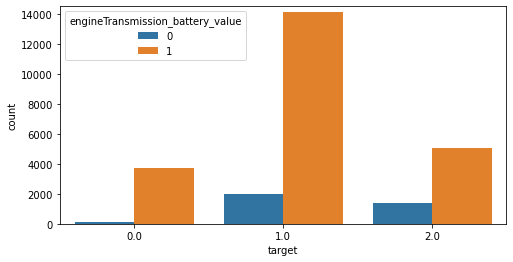

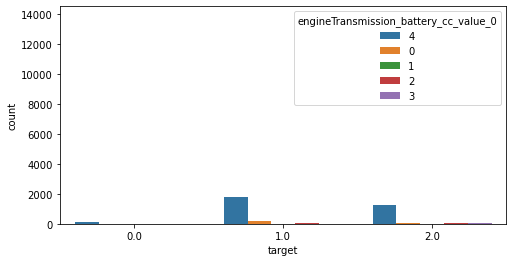

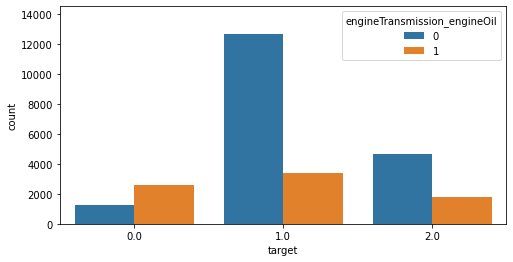

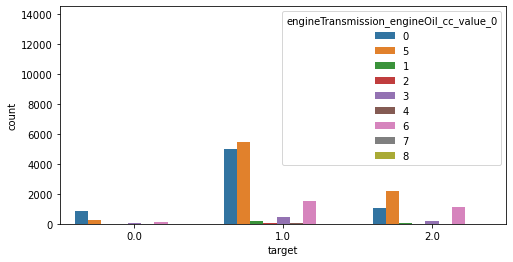

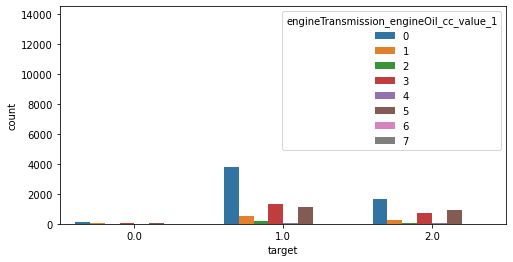

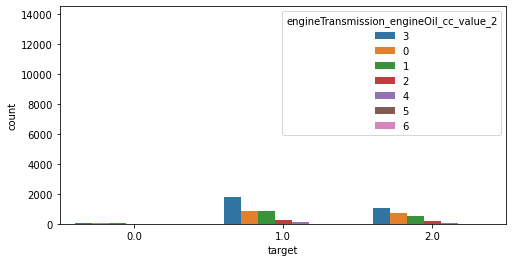

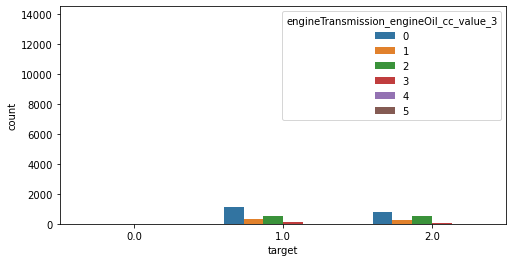

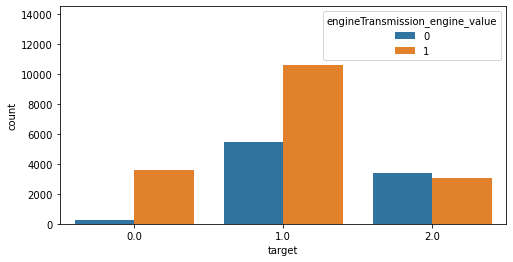

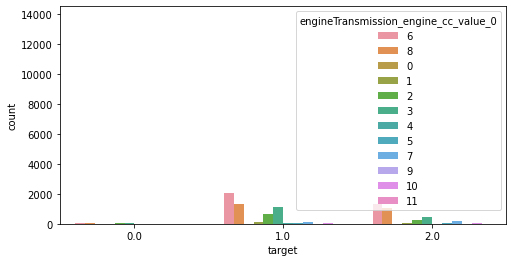

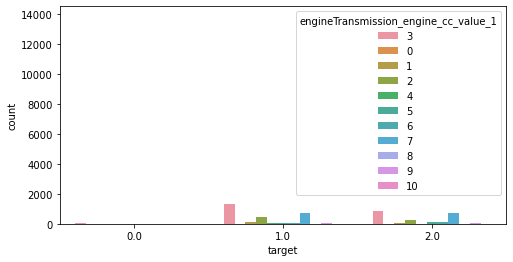

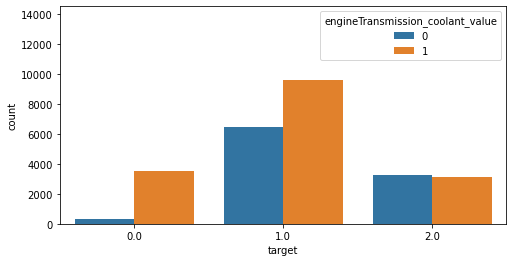

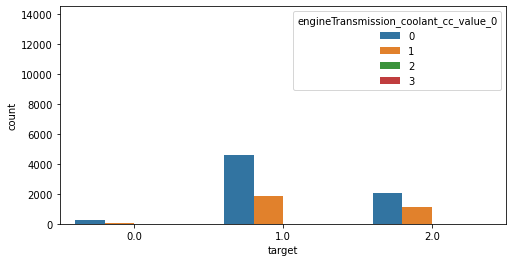

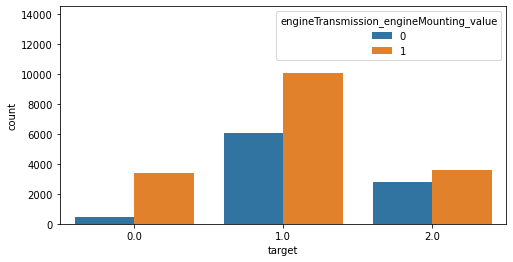

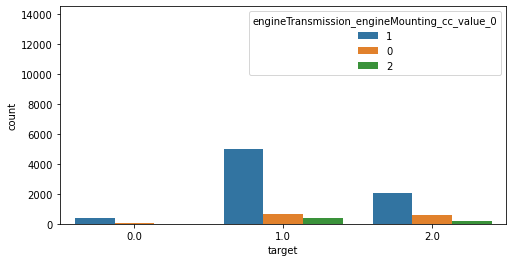

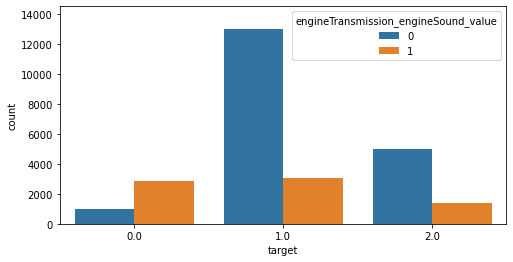

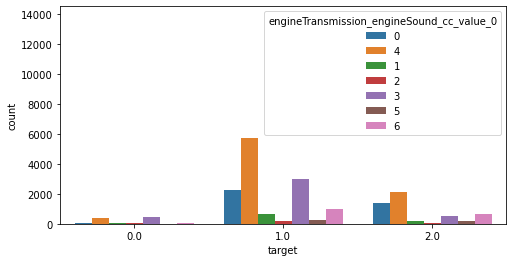

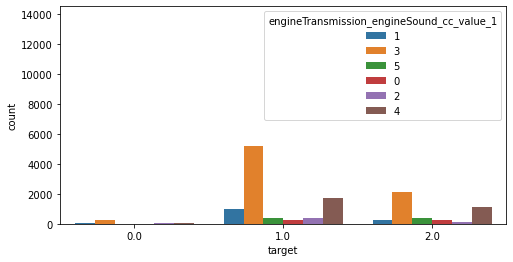

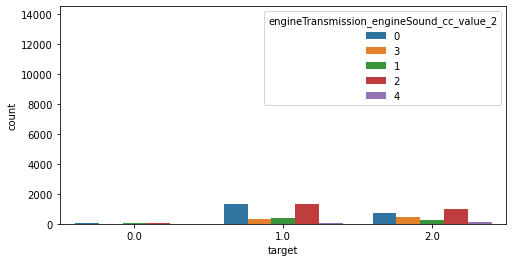

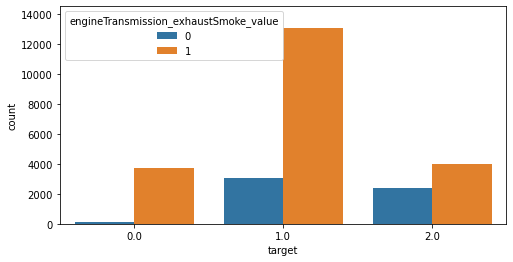

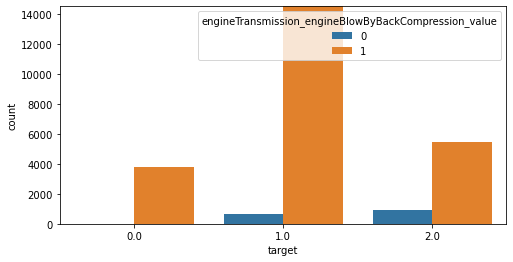

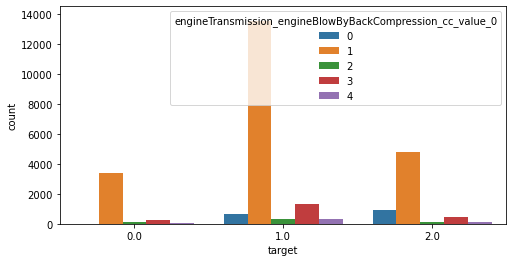

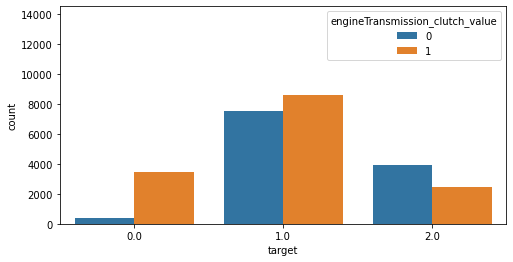

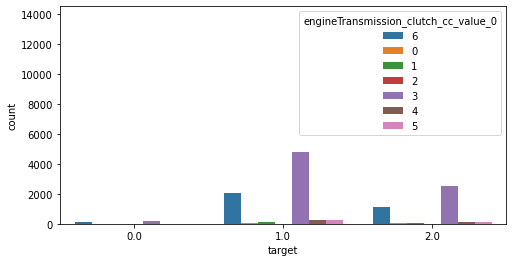

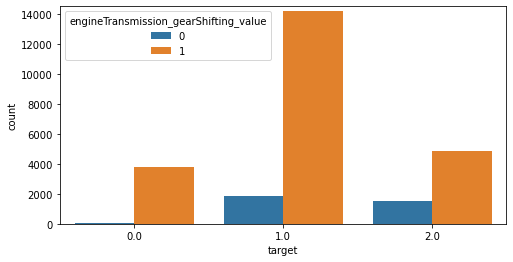

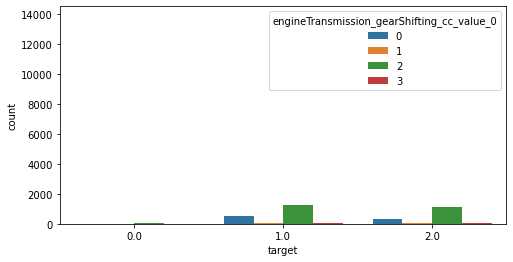

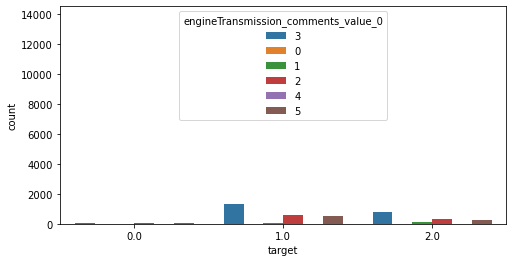

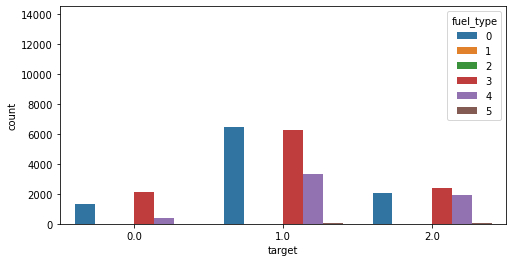

In [185]:
for i in imp_feat_cat:
    f, ax = plt.subplots(figsize=(8, 4))
    fig = sns.countplot(x='target', hue = i, data=df)
    fig.axis(ymin=0, ymax=14500)

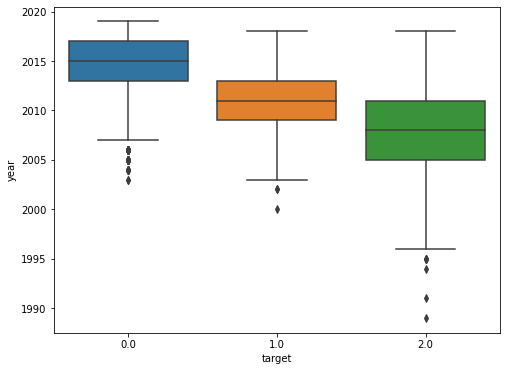

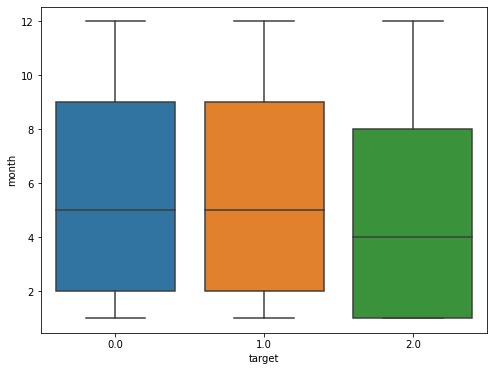

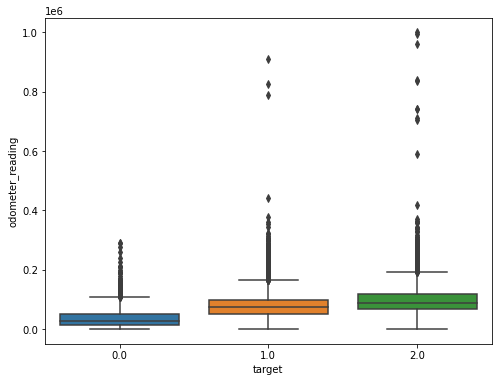

In [34]:
for i in imp_feat_num:
    f, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(x = 'target', y =i, data = df)
    

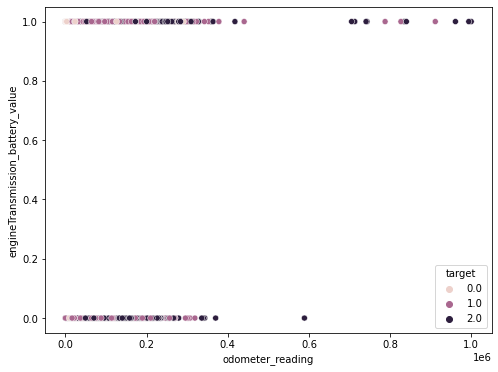

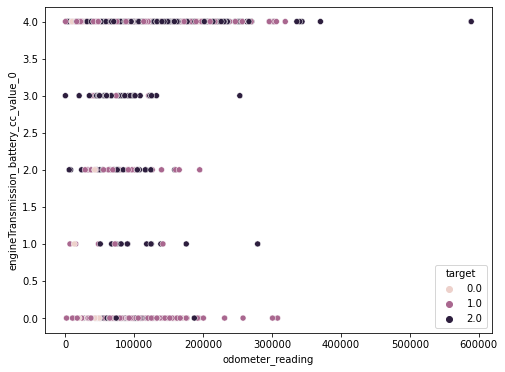

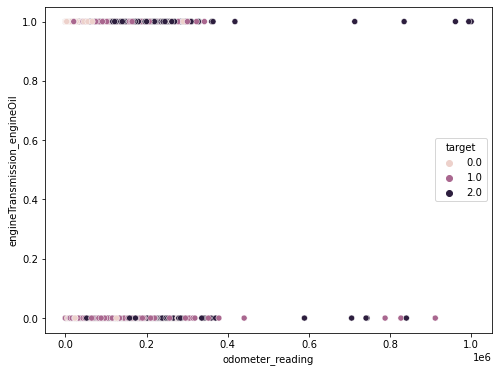

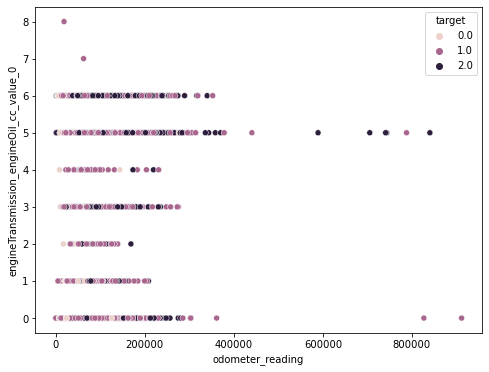

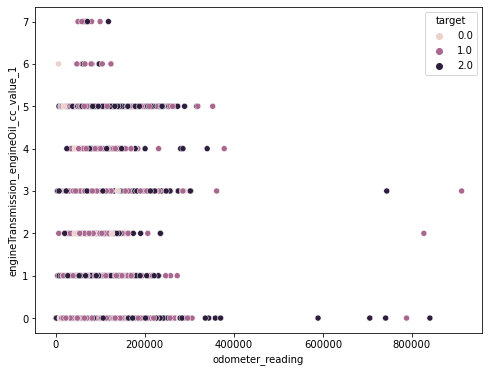

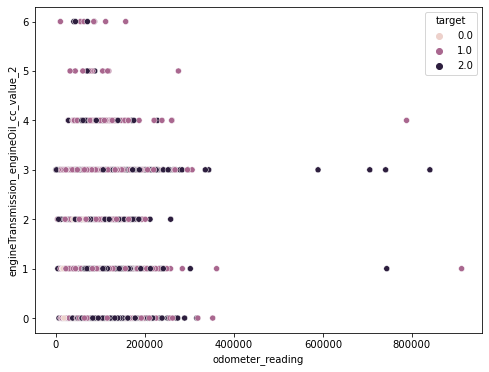

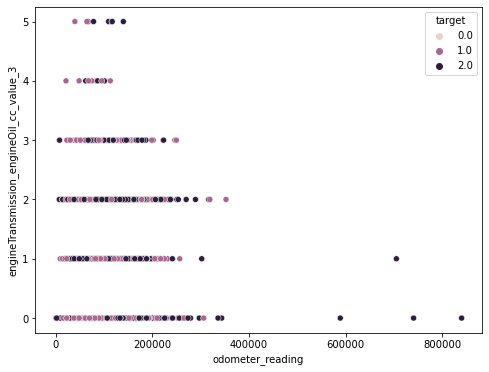

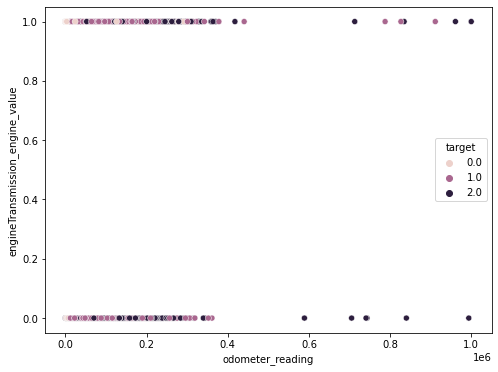

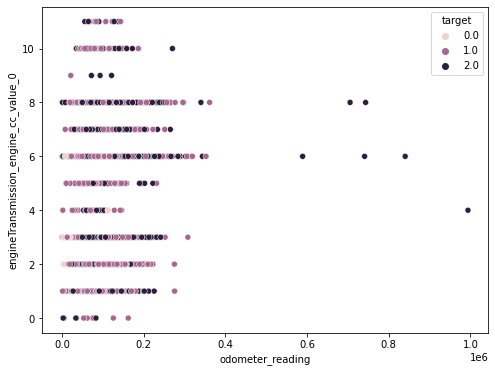

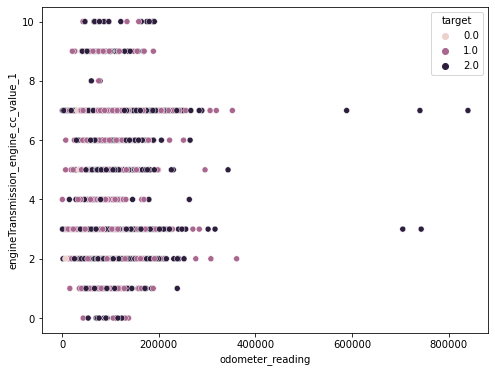

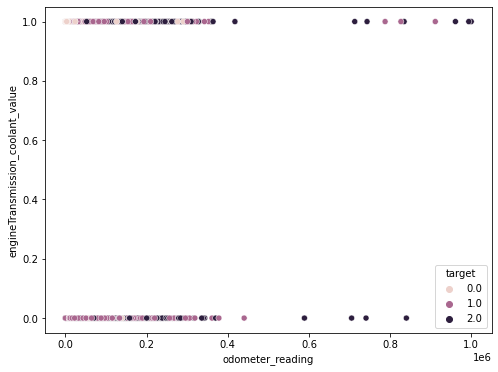

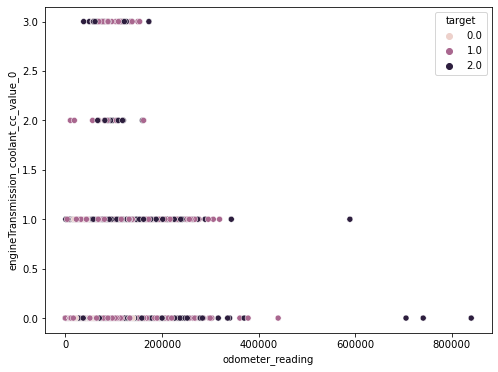

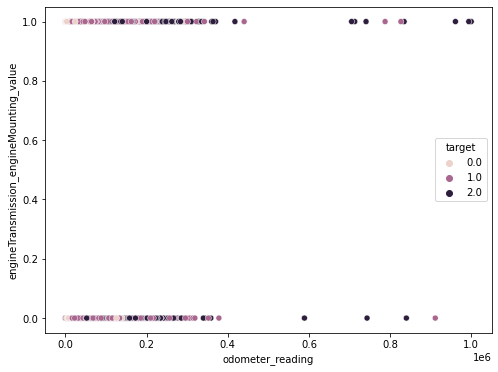

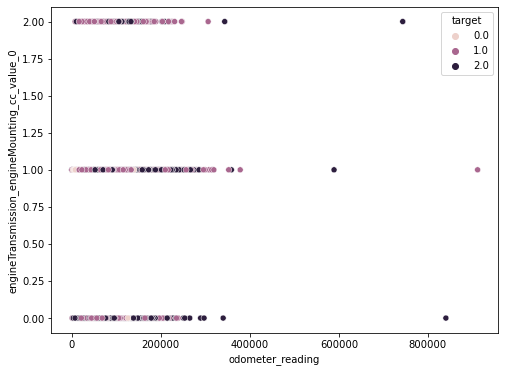

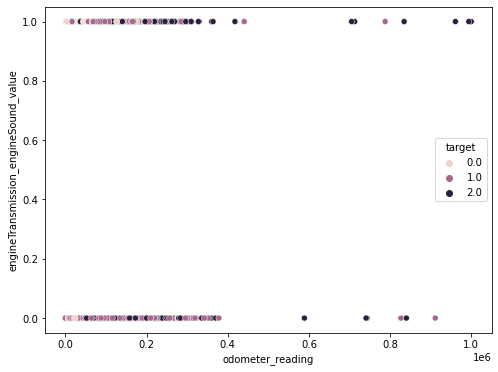

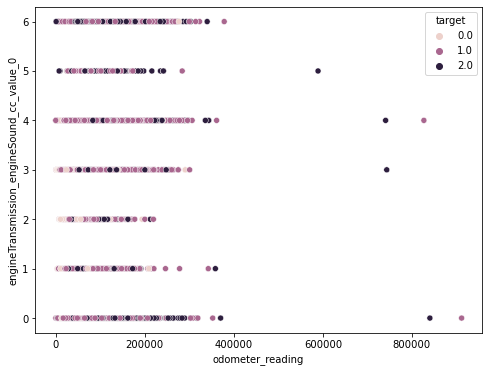

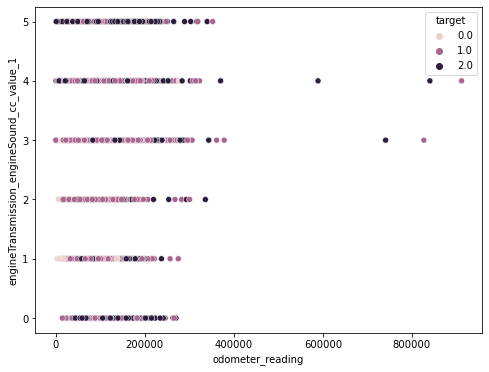

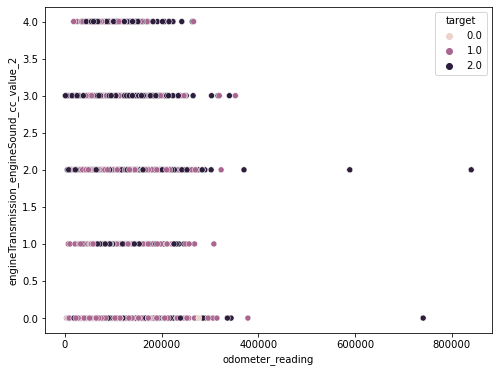

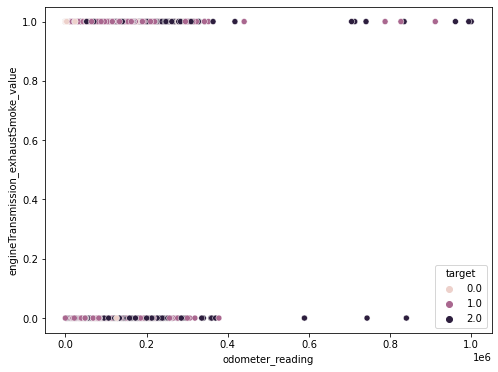

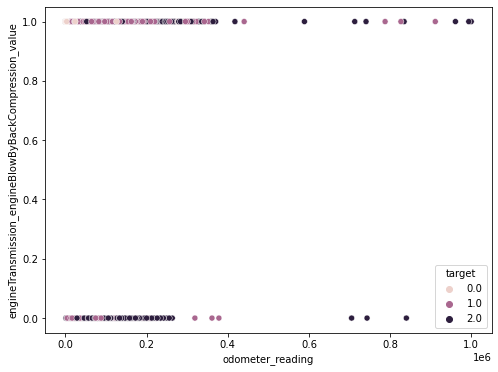

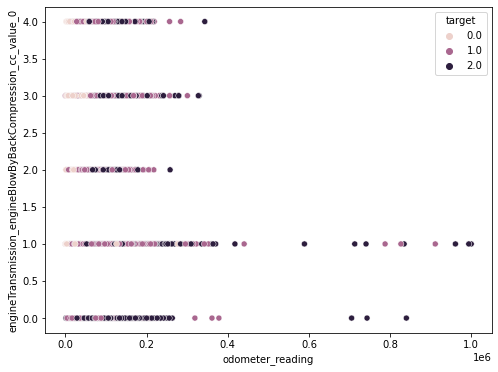

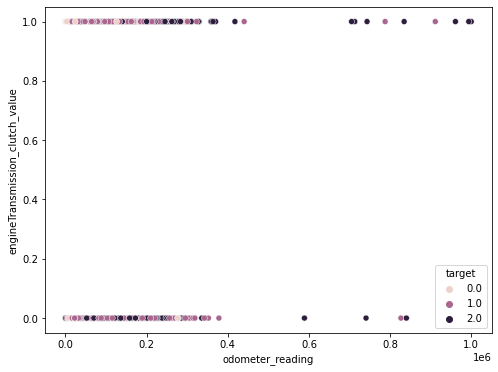

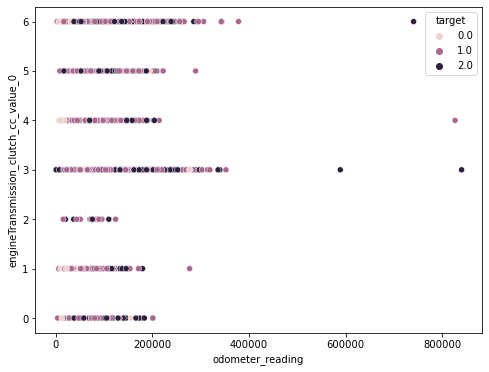

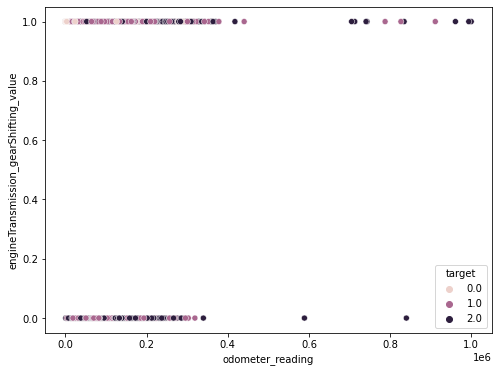

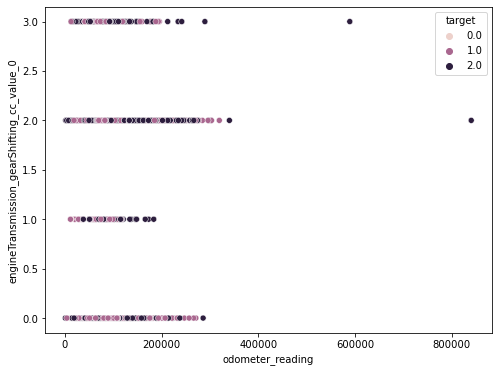

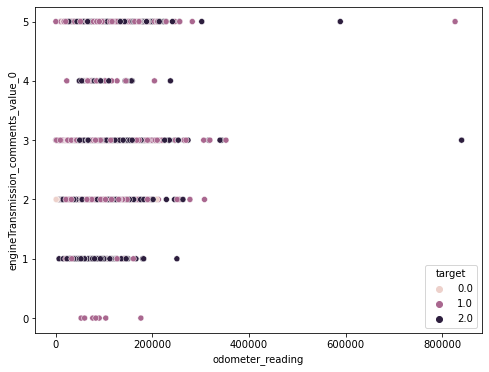

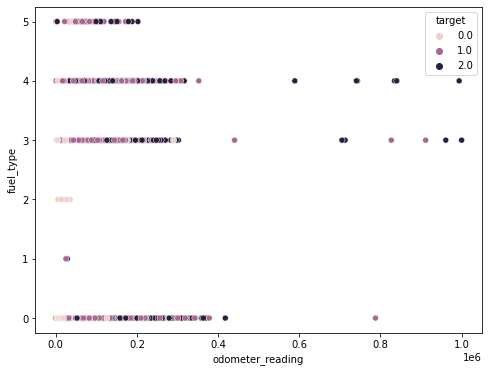

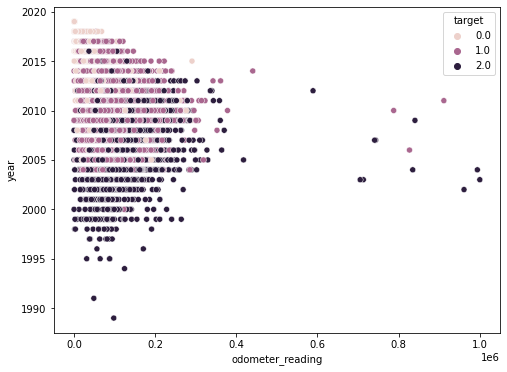

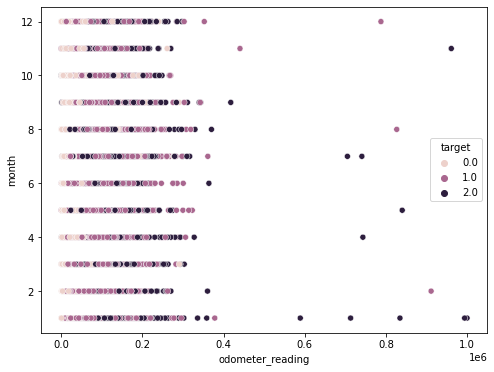

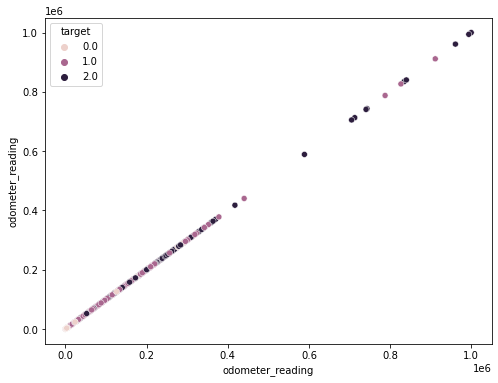

In [126]:
for i in imp_feat:
    f, ax = plt.subplots(figsize = (8,6))
    sns.scatterplot(x = 'odometer_reading', y =i,hue = 'target', data = df)

# train test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[imp_feat], df['target'], test_size=0.25, stratify=df['target'])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19730, 30)
(6577, 30)
(19730,)
(6577,)


In [36]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')
y_train = y_train.astype('float')
y_test =y_test.astype('float')

In [37]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()
y_train1 = y_train.copy()
y_test1 = y_test.copy()

In [38]:
X_train1 = X_train1.replace([np.nan, np.inf], -999)
X_test1 = X_test1.replace([np.nan, np.inf], -999)

# Modelling
Directly moving for tree based approach as there is no sign for linear separability

# DT

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
dt = DecisionTreeClassifier(max_depth=8)
dt.fit(X_train1, y_train1)
y_train_pred = dt.predict(X_train1)
y_train_pred_prob = dt.predict_proba(X_train1)
y_test_prob = dt.predict(X_test1)
y_test_prob_prob = dt.predict_proba(X_test1)

print('Train')
print(classification_report(y_train1, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test1, y_test_prob))

Train
              precision    recall  f1-score   support

         0.0       0.74      0.63      0.68      2874
         1.0       0.76      0.88      0.81     12072
         2.0       0.73      0.51      0.60      4784

    accuracy                           0.75     19730
   macro avg       0.74      0.67      0.70     19730
weighted avg       0.75      0.75      0.74     19730

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.72      0.62      0.67       958
         1.0       0.74      0.85      0.79      4024
         2.0       0.67      0.47      0.55      1595

    accuracy                           0.73      6577
   macro avg       0.71      0.65      0.67      6577
weighted avg       0.72      0.73      0.72      6577



In [106]:
print('Train AUC: ', roc_auc_score(y_train1, y_train_pred_prob, multi_class='ovr'))
print('Test AUC: ', roc_auc_score(y_test1, y_test_prob_prob, multi_class='ovr'))

Train AUC:  0.8565586329234215
Test AUC:  0.8296408086552706


Text(51.0, 0.5, 'actual')

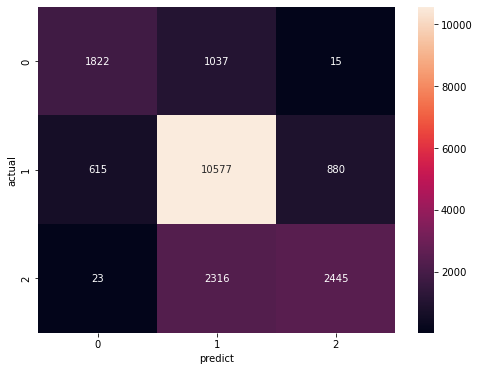

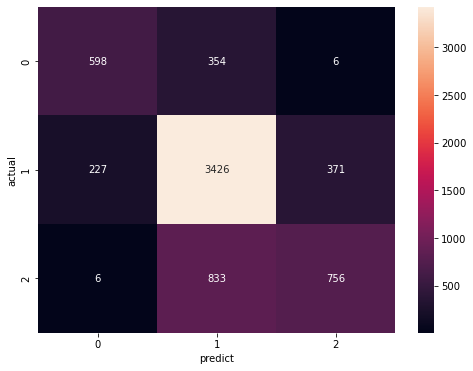

In [107]:
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_train1, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test1, y_test_prob), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

# RF

In [108]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
rf = RandomForestClassifier(max_depth=8)
rf.fit(X_train1, y_train1)
y_train_pred = rf.predict(X_train1)
y_train_pred_prob = rf.predict_proba(X_train1)
y_test_pred = rf.predict(X_test1)
y_test_pred_prob = rf.predict_proba(X_test1)

print('Train')
print(classification_report(y_train1, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test1, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.78      0.58      0.67      2874
         1.0       0.74      0.94      0.83     12072
         2.0       0.86      0.42      0.56      4784

    accuracy                           0.76     19730
   macro avg       0.79      0.65      0.69     19730
weighted avg       0.78      0.76      0.74     19730

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.80      0.59      0.68       958
         1.0       0.74      0.93      0.82      4024
         2.0       0.81      0.41      0.54      1595

    accuracy                           0.75      6577
   macro avg       0.78      0.64      0.68      6577
weighted avg       0.76      0.75      0.73      6577



In [109]:
print('Train AUC: ', roc_auc_score(y_train1, y_train_pred_prob, multi_class='ovr'))
print('Test AUC: ', roc_auc_score(y_test1, y_test_pred_prob, multi_class='ovr'))

Train AUC:  0.8786528053700652
Test AUC:  0.8577042804848553


Text(51.0, 0.5, 'actual')

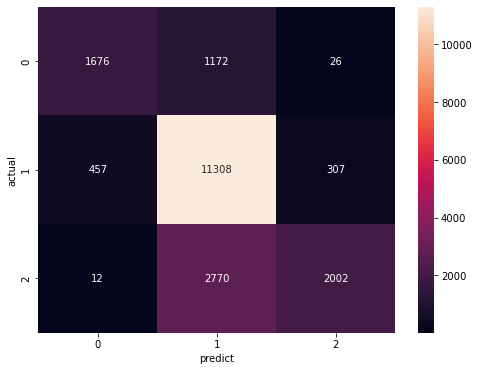

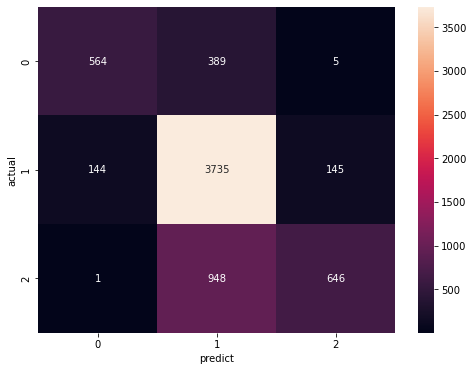

In [110]:
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_train1, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test1, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

# LGBM

In [156]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(max_depth=7)
lgb.fit(X_train1, y_train1)
y_train_pred = lgb.predict(X_train1)
y_train_pred_prob =lgb.predict_proba(X_train1)
y_test_prob = lgb.predict(X_test1)
y_test_prob_prob = lgb.predict_proba(X_test1)

print('Train')
print(classification_report(y_train1, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test1, y_test_pred))

Train
              precision    recall  f1-score   support

         0.0       0.79      0.65      0.71      2874
         1.0       0.79      0.92      0.85     12072
         2.0       0.87      0.60      0.71      4784

    accuracy                           0.80     19730
   macro avg       0.82      0.72      0.76     19730
weighted avg       0.81      0.80      0.80     19730

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.80      0.59      0.68       958
         1.0       0.74      0.93      0.82      4024
         2.0       0.81      0.41      0.54      1595

    accuracy                           0.75      6577
   macro avg       0.78      0.64      0.68      6577
weighted avg       0.76      0.75      0.73      6577



In [157]:
print('Train AUC: ', roc_auc_score(y_train1, y_train_pred_prob, multi_class='ovr'))
print('Test AUC: ', roc_auc_score(y_test1, y_test_pred_prob, multi_class='ovr'))

Train AUC:  0.9180320300718515
Test AUC:  0.8577042804848553


Text(51.0, 0.5, 'actual')

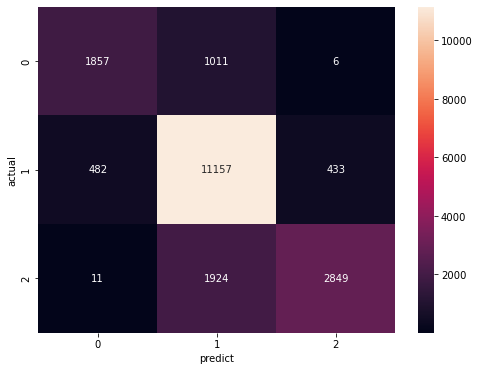

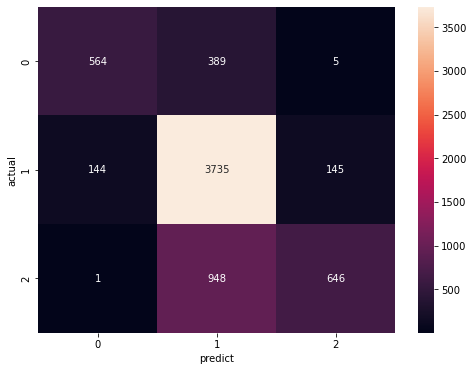

In [158]:
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_train1, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test1, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

In [159]:
# Parameter Tuning
import time
start = time.time()
grid_params = {
    'boosting_type':['gbdt'],
   
    'feature_fraction':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'subsample':[0.5, 0.6, 0.7, 0.8, 0.9, 1],
#    'subsample_freq':[0,5],  
   
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.15, 0.2, 0.5],    #0.4
    'num_iterations': [50, 100, 200, 500, 800, 1000],  #100
    'max_depth':[2,3,4, 5, 6, 8, 10, 12, 15, 20], #-1

    'min_data_in_leaf':[50, 100, 200, 500, 800, 1000],    #500
#    'min_data_in_bin':[50, 100, 200, 500, 800, 1000, ], #
    'num_leaves': [5, 10, 20, 30, 40, 50, 60, 80, 100], #30
#    'min_split_gain':[1,2], #0.1
#    'min_child_weight':[],

    'n_estimators': [50, 100, 200, 400, 500, 800, 1000],    #1000
    'max_bin':[255],
    'random_state':[100],
   
    'reg_alpha' : [0, 1, 2, 3, 4, 5, 6], #5
    'reg_lambda' : [0, 1, 2, 3, 4, 5, 6],#0.1
     'early_stopping_rounds':[0 , 10, 20, 50, 100]

    }
from sklearn.model_selection import RandomizedSearchCV

model = LGBMClassifier()
random_search= RandomizedSearchCV(estimator=model, param_distributions=grid_params, n_iter=100, n_jobs=-1, cv=5)
random_search = random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)
print('time: ', time.time()- start)

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] early_stopping_round is set=0, early_stopping_rounds=0 will be ignored. Current value: early_stopping_round=0
{'subsample': 0.8, 'reg_lambda': 3, 'reg_alpha': 0, 'random_state': 100, 'num_leaves': 40, 'num_iterations': 200, 'n_estimators': 200, 'min_data_in_leaf': 100, 'max_depth': 8, 'max_bin': 255, 'learning_rate': 0.1, 'feature_fraction': 0.5, 'early_stopping_rounds': 0, 'boosting_type': 'gbdt'}
0.7521540800810949
time:  112.50479865074158


In [163]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(subsample= 0.8, reg_lambda= 3, reg_alpha= 0, random_state= 100, num_leaves= 40,
                     num_iterations= 200, n_estimators= 200, min_data_in_leaf= 100, max_depth= 8, max_bin= 255,
                     learning_rate= 0.1, feature_fraction= 0.5, early_stopping_rounds= 0, boosting_type= 'gbdt')
lgb.fit(X_train1, y_train1)
y_train_pred = lgb.predict(X_train1)
y_train_pred_prob =lgb.predict_proba(X_train1)
y_test_prob = lgb.predict(X_test1)
y_test_prob_prob = lgb.predict_proba(X_test1)

print('Train')
print(classification_report(y_train1, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test1, y_test_pred))

[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] early_stopping_round is set=0, early_stopping_rounds=0 will be ignored. Current value: early_stopping_round=0
Train
              precision    recall  f1-score   support

         0.0       0.79      0.64      0.71      2874
         1.0       0.80      0.93      0.86     12072
         2.0       0.88      0.64      0.74      4784

    accuracy                           0.82     19730
   macro avg       0.83      0.74      0.77     19730
weighted avg       0.82      0.82      0.81     19730

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.80      0.59      0.68       958
         1.0       0.74      0.93      0.82      

In [164]:
print('Train AUC: ', roc_auc_score(y_train1, y_train_pred_prob, multi_class='ovr'))
print('Test AUC: ', roc_auc_score(y_test1, y_test_pred_prob, multi_class='ovr'))

Train AUC:  0.9323636576590374
Test AUC:  0.8577042804848553


Text(51.0, 0.5, 'actual')

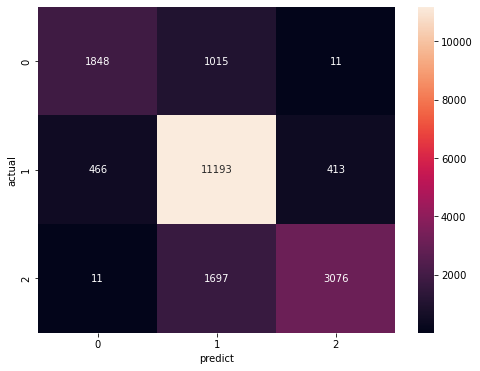

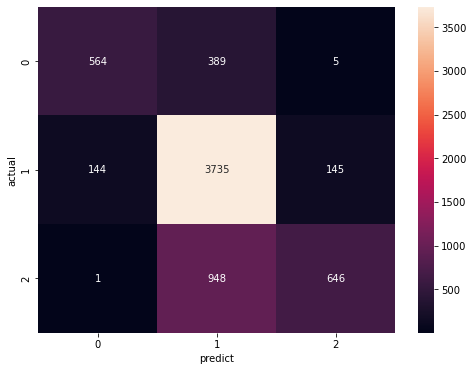

In [165]:
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_train1, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test1, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

In [77]:
y_test.value_counts()

1.0    4024
2.0    1595
0.0     958
Name: target, dtype: int64

In [82]:
importance = lgb.feature_importances_
importance_df = pd.DataFrame(imp_feat,columns=['variable_name'])
importance_df['wieghts'] = importance
importance_df['wieghts'] = abs(importance_df['wieghts'])
importance_df['wieghts'] = importance_df['wieghts']*1
importance_df = importance_df.sort_values(by=['wieghts'],ascending=False)
importance_df = importance_df.reset_index(inplace=False)
importance_df = importance_df.drop(['index'],axis=1)
importance_df

,variable_name,wieghts
0,odometer_reading,6174
1,year,3140
2,month,2735
3,engineTransmission_engineSound_cc_value_0,1920
4,engineTransmission_engineOil_cc_value_0,1604
5,engineTransmission_engine_cc_value_0,1303
6,engineTransmission_clutch_cc_value_0,1215
7,engineTransmission_engineOil_cc_value_1,1181
8,engineTransmission_engineSound_cc_value_1,1145
9,engineTransmission_engineSound_cc_value_2,917


In [100]:
lgm_feat = list(importance_df['variable_name'][:17])

# Training LGBM model again with top 17 features

In [153]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(subsample= 0.9, reg_lambda= 4, reg_alpha= 2, random_state= 100, num_leaves= 60,
                     num_iterations= 200, n_estimators= 50, min_data_in_leaf= 100, max_depth= 10, max_bin= 255,
                     learning_rate= 0.05, feature_fraction= 0.6, early_stopping_rounds= 0, boosting_type= 'gbdt'
                    #,class_weight = {0:1.2, 1:1.2, 2:1}
                    )
lgb.fit(X_train1[lgm_feat], y_train1)
y_train_pred = lgb.predict(X_train1[lgm_feat])
y_train_pred_prob =lgb.predict_proba(X_train1[lgm_feat])
y_test_prob = lgb.predict(X_test1[lgm_feat])
y_test_prob_prob = lgb.predict_proba(X_test1[lgm_feat])

print('Train')
print(classification_report(y_train1, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test1, y_test_pred))

print('*'*70)
print('Train AUC: ', roc_auc_score(y_train1, y_train_pred_prob, multi_class='ovr'))
print('Test AUC: ', roc_auc_score(y_test1, y_test_pred_prob, multi_class='ovr'))

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] early_stopping_round is set=0, early_stopping_rounds=0 will be ignored. Current value: early_stopping_round=0
Train
              precision    recall  f1-score   support

         0.0       0.78      0.62      0.69      2874
         1.0       0.78      0.92      0.85     12072
         2.0       0.85      0.59      0.69      4784

    accuracy                           0.80     19730
   macro avg       0.81      0.71      0.74     19730
weighted avg       0.80      0.80      0.79     19730

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.80      0.59      0.68       958
         1.0       0.74      0.93      0.82      

Text(51.0, 0.5, 'actual')

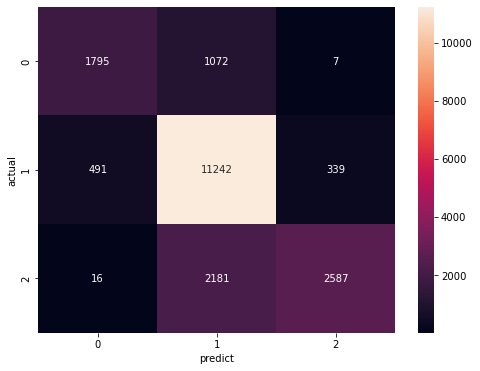

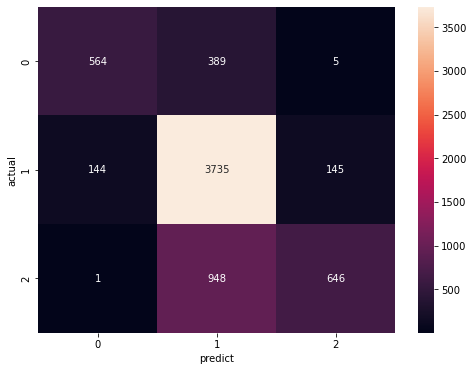

In [115]:
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_train1, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test1, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

In [116]:
importance = lgb.feature_importances_
importance_df = pd.DataFrame(lgm_feat,columns=['variable_name'])
importance_df['wieghts'] = importance
importance_df['wieghts'] = abs(importance_df['wieghts'])
importance_df['wieghts'] = importance_df['wieghts']*1
importance_df = importance_df.sort_values(by=['wieghts'],ascending=False)
importance_df = importance_df.reset_index(inplace=False)
importance_df = importance_df.drop(['index'],axis=1)
importance_df

,variable_name,wieghts
0,odometer_reading,7480
1,year,3490
2,month,3226
3,engineTransmission_engineSound_cc_value_0,2387
4,engineTransmission_engineOil_cc_value_0,1846
5,engineTransmission_engine_cc_value_0,1533
6,engineTransmission_engineSound_cc_value_1,1483
7,engineTransmission_engineOil_cc_value_1,1372
8,engineTransmission_clutch_cc_value_0,1290
9,engineTransmission_coolant_cc_value_0,1218


# XGBoost

In [50]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_train_pred_prob = xgb.predict_proba(X_train)
y_test_pred = xgb.predict(X_test)
y_test_pred_prob = xgb.predict_proba(X_test)

print("train")
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

[10:10:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train
              precision    recall  f1-score   support

         0.0       0.84      0.72      0.77      2874
         1.0       0.84      0.95      0.89     12072
         2.0       0.94      0.71      0.81      4784

    accuracy                           0.86     19730
   macro avg       0.87      0.79      0.82     19730
weighted avg       0.86      0.86      0.85     19730

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.77      0.62      0.69       958
         1.0       0.76      0.88      0.82      4024
         2.0       0.73      0.53      0.61      1595

    accu

In [51]:
print('Train AUC: ', roc_auc_score(y_train, y_train_pred_prob, multi_class='ovr'))
print('Test AUC:', roc_auc_score(y_test, y_test_pred_prob, multi_class='ovr'))

Train AUC:  0.9549606879277489
Test AUC: 0.864244474705297


Text(51.0, 0.5, 'actual')

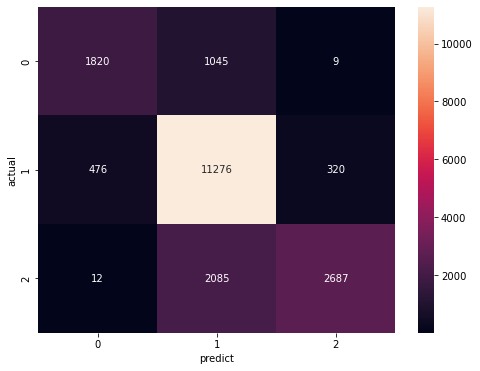

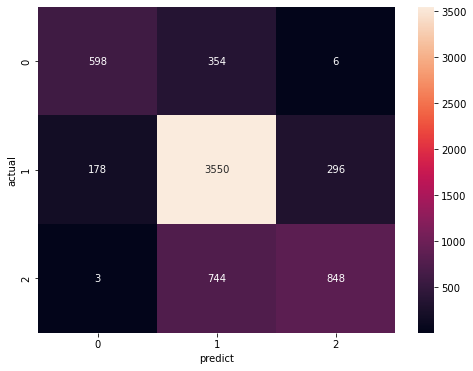

In [79]:
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_train1, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
plt.subplots(figsize = (8,6))
sns.heatmap(confusion_matrix(y_test1, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

In [53]:
importance = xgb.feature_importances_
importance_df = pd.DataFrame(imp_feat,columns=['variable_name'])
importance_df['wieghts'] = importance
importance_df['wieghts'] = abs(importance_df['wieghts'])
importance_df['wieghts'] = importance_df['wieghts']*1
importance_df = importance_df.sort_values(by=['wieghts'],ascending=False)
importance_df = importance_df.reset_index(inplace=False)
importance_df = importance_df.drop(['index'],axis=1)

In [54]:
importance_df

,variable_name,wieghts
0,engineTransmission_engineSound_value,0.167009
1,engineTransmission_engineOil,0.121255
2,engineTransmission_clutch_value,0.098429
3,year,0.060651
4,engineTransmission_engine_value,0.053020
5,engineTransmission_exhaustSmoke_value,0.050019
6,engineTransmission_engineBlowByBackCompression...,0.048125
7,engineTransmission_clutch_cc_value_0,0.028938
8,engineTransmission_coolant_value,0.028821
9,engineTransmission_engineSound_cc_value_2,0.028243


In [ ]:
xgb_25 = list(importance_df['variable_name'][:25])

# XGBoost parameter tuning

In [57]:
import time
start = time.time()
param = {'max_depth':[2,3,4,5,6,10,13],
         'min_child_weight':[2,3,4,5,6]}

from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier()
random_search= RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=100, n_jobs=-1, cv=5)
random_search = random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)
print('time: ', time.time()- start)

[10:20:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'min_child_weight': 6, 'max_depth': 5}
0.7499746578813989
time:  413.96925377845764


In [58]:
start =time.time()
param = {'gamma':[0,0.1, 0.2, 0.3, 0.4, 0.5]}

from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier()
random_search= RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=100, n_jobs=-1, cv=5)
random_search = random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)
print('time: ', time.time()- start)

[10:21:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'gamma': 0.4}
0.7474911302584897
time:  71.96483063697815


In [59]:
start =time.time()
param = {'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]}

from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier()
random_search= RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=100, n_jobs=-1, cv=5)
random_search = random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)
print('time: ', time.time()- start)
start =time.time()

[10:24:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'subsample': 0.9, 'colsample_bytree': 0.6}
0.7473897617840851
time:  165.86294651031494


In [61]:
param = {'reg_alpha':[0.01, 0.03, 0.05, 0.08, 0.1, 0.15, 0.2]}

from sklearn.model_selection import RandomizedSearchCV

model = XGBClassifier()
random_search= RandomizedSearchCV(estimator=model, param_distributions=param, n_iter=100, n_jobs=-1, cv=5)
random_search = random_search.fit(X_train, y_train)

print(random_search.best_params_)
print(random_search.best_score_)
print('time: ', time.time()- start)

[10:36:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'reg_alpha': 0.15}
0.7474404460212873
time:  704.5074169635773


In [166]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
xgb = XGBClassifier(min_child_weight= 6, max_depth= 5, gamma= 0.4, subsample= 0.9, colsample_bytree= 0.6, reg_alpha= 0.15)
xgb.fit(X_train, y_train)
y_train_pred = xgb.predict(X_train)
y_train_pred_prob = xgb.predict_proba(X_train)
y_test_pred = xgb.predict(X_test)
y_test_pred_prob = xgb.predict_proba(X_test)

print("train")
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

[15:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
train
              precision    recall  f1-score   support

         0.0       0.80      0.64      0.71      2874
         1.0       0.80      0.93      0.86     12072
         2.0       0.88      0.63      0.73      4784

    accuracy                           0.81     19730
   macro avg       0.83      0.73      0.77     19730
weighted avg       0.82      0.81      0.81     19730

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.77      0.62      0.69       958
         1.0       0.76      0.88      0.82      4024
         2.0       0.74      0.53      0.62      1595

    accu

In [167]:
importance = xgb.feature_importances_
importance_df = pd.DataFrame(imp_feat,columns=['variable_name'])
importance_df['wieghts'] = importance
importance_df['wieghts'] = abs(importance_df['wieghts'])
importance_df['wieghts'] = importance_df['wieghts']*1
importance_df = importance_df.sort_values(by=['wieghts'],ascending=False)
importance_df = importance_df.reset_index(inplace=False)
importance_df = importance_df.drop(['index'],axis=1)
importance_df

,variable_name,wieghts
0,engineTransmission_engineSound_value,0.238699
1,engineTransmission_engineOil,0.087957
2,year,0.079781
3,engineTransmission_clutch_value,0.066612
4,engineTransmission_exhaustSmoke_value,0.050688
5,engineTransmission_coolant_value,0.039502
6,engineTransmission_engineBlowByBackCompression...,0.034866
7,engineTransmission_clutch_cc_value_0,0.030628
8,engineTransmission_engineOil_cc_value_0,0.029743
9,engineTransmission_engine_value,0.025769


In [170]:
xgb_feat = list(importance_df['variable_name'][:18])

In [176]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
xgb = XGBClassifier(min_child_weight= 6, max_depth= 5, gamma= 0.4, subsample= 0.9, colsample_bytree= 0.6, reg_alpha= 0.15)
xgb.fit(X_train[xgb_feat], y_train)
y_train_pred = xgb.predict(X_train[xgb_feat])
y_train_pred_prob = xgb.predict_proba(X_train[xgb_feat])
y_test_pred = xgb.predict(X_test[xgb_feat])
y_test_pred_prob = xgb.predict_proba(X_test[xgb_feat])

print("Train")
print(classification_report(y_train, y_train_pred))
print('-'*70)
print('Test')
print(classification_report(y_test, y_test_pred))

print('*'*70)
print('Train AUC: ', roc_auc_score(y_train, y_train_pred_prob, multi_class='ovr'))
print('Test AUC:', roc_auc_score(y_test, y_test_pred_prob, multi_class='ovr'))

[15:29:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train
              precision    recall  f1-score   support

         0.0       0.78      0.63      0.70      2874
         1.0       0.79      0.92      0.85     12072
         2.0       0.84      0.58      0.69      4784

    accuracy                           0.79     19730
   macro avg       0.80      0.71      0.74     19730
weighted avg       0.80      0.79      0.79     19730

----------------------------------------------------------------------
Test
              precision    recall  f1-score   support

         0.0       0.76      0.62      0.68       958
         1.0       0.76      0.88      0.81      4024
         2.0       0.72      0.52      0.60      1595

    accu

Train
Test


Text(15.0, 0.5, 'actual')

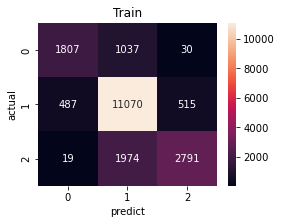

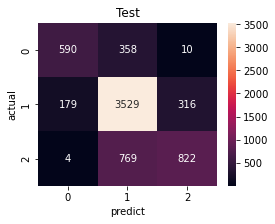

In [183]:
print('Train')
plt.subplots(figsize = (4,3))
plt.title('Train')
sns.heatmap(confusion_matrix(y_train1, y_train_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')
print('Test')
plt.subplots(figsize = (4,3))
plt.title('Test')
sns.heatmap(confusion_matrix(y_test1, y_test_pred), fmt = 'd', annot = True)
plt.xlabel('predict')
plt.ylabel('actual')

# feature importance

In [174]:
importance = xgb.feature_importances_
importance_df = pd.DataFrame(xgb_feat,columns=['variable_name'])
importance_df['wieghts'] = importance
importance_df['wieghts'] = abs(importance_df['wieghts'])
importance_df['wieghts'] = importance_df['wieghts']*1
importance_df = importance_df.sort_values(by=['wieghts'],ascending=False)
importance_df = importance_df.reset_index(inplace=False)
importance_df = importance_df.drop(['index'],axis=1)
importance_df

,variable_name,wieghts
0,engineTransmission_engineSound_value,0.205416
1,year,0.102657
2,engineTransmission_clutch_value,0.098821
3,engineTransmission_engineOil,0.083278
4,engineTransmission_engineBlowByBackCompression...,0.064618
5,engineTransmission_exhaustSmoke_value,0.055840
6,engineTransmission_engine_value,0.052551
7,engineTransmission_engineOil_cc_value_0,0.044224
8,engineTransmission_coolant_value,0.042269
9,engineTransmission_engineSound_cc_value_0,0.037018


# Saving model

In [172]:
import pickle
pickle.dump(xgb, open('xgb_model_with_18_feats.pkl', 'wb'))

# Conclusion
1. Trained Decision Tree, Random Forest, Light Gradient Boosting and XGBoost model. <br>
2. Out of all trained model perfromace of LGBM and XGBoost are better.
3. Selecting XGBoost model as final model as it's performance is highest.
4. Finally the selected XGBoost model is again giving simlar performance with top 18 features (using feature importance).

# Libraries version used

In [151]:
from platform import python_version
import matplotlib
import seaborn
import sklearn
import pickle
import statsmodels
print('python version:',python_version())
print('pandas version:',pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', seaborn.__version__)
print('sklearn version:', sklearn.__version__)
print('pickle version:', pickle.format_version)
print('statsmodels version', statsmodels.__version__)

python version: 3.9.7
pandas version: 1.3.4
numpy version: 1.20.3
matplotlib version: 3.4.3
seaborn version: 0.11.2
sklearn version: 0.24.2
pickle version: 4.0
statsmodels version 0.12.2
